In [81]:
library(dplyr)
library(tsibble)
library(fpp3) 
options(repr.plot.width=25)

calendar <- read.csv('Datasets/calendar_afcs2024.csv')
prices <- read.csv('Datasets/sell_prices_afcs2024.csv')
sales_train <- read.csv('Datasets/sales_train_validation_afcs2024.csv')

In [2]:
# Transpose sale CSV to match forcasting-usable format
# After transpose, ensure datatypes are int, surpress row names being selected in df

sales_transposed <- t(sales_train)
sales_df <- as.data.frame(sales_transposed[-1,]) %>% mutate_all(as.integer)
colnames(sales_df) <- sales_transposed[1,]
row.names(sales_df) <- NULL

#sales_df <- tibble::rownames_to_column(sales_df, "Day")
#sales_ts <- as_tsibble(sales_df, index = Day)
#sales_ts <- as_tsibble(sales_df)

# Count totals over the rows, just as a possible informative data about overall food items sales
# Add day counter to both df's to make merging possible (otherwise no key)

sales_df$total <- rowSums(sales_df)
sales_df$day <- 1:nrow(sales_df)
calendar$day <- 1:nrow(calendar)

In [3]:
# Merge dataframes and convert to tsibble 

calendar_sales <- merge(calendar,sales_df)
calendar_sales <- calendar_sales %>% as_tsibble(index = day)
calendar_sales$is_event <- ifelse(calendar_sales$event_name_1 != "NA", 1, 0)


In [4]:
calendar_sales

day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,⋯,3,0,7,0,0,0,0,0,1686,NA
2,1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,⋯,2,0,5,0,1,0,0,0,1661,NA
3,1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,⋯,1,0,5,0,0,0,0,0,1189,NA
4,2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,⋯,3,0,3,0,1,2,0,0,1137,NA
5,2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,⋯,0,0,0,0,0,1,0,0,954,NA
6,2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,⋯,0,0,3,0,2,1,0,0,1598,NA
7,2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,⋯,1,0,0,0,0,0,0,0,1107,NA
8,2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,⋯,0,0,1,0,1,0,0,0,1680,NA
9,2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,⋯,1,0,7,0,1,1,0,0,1660,1


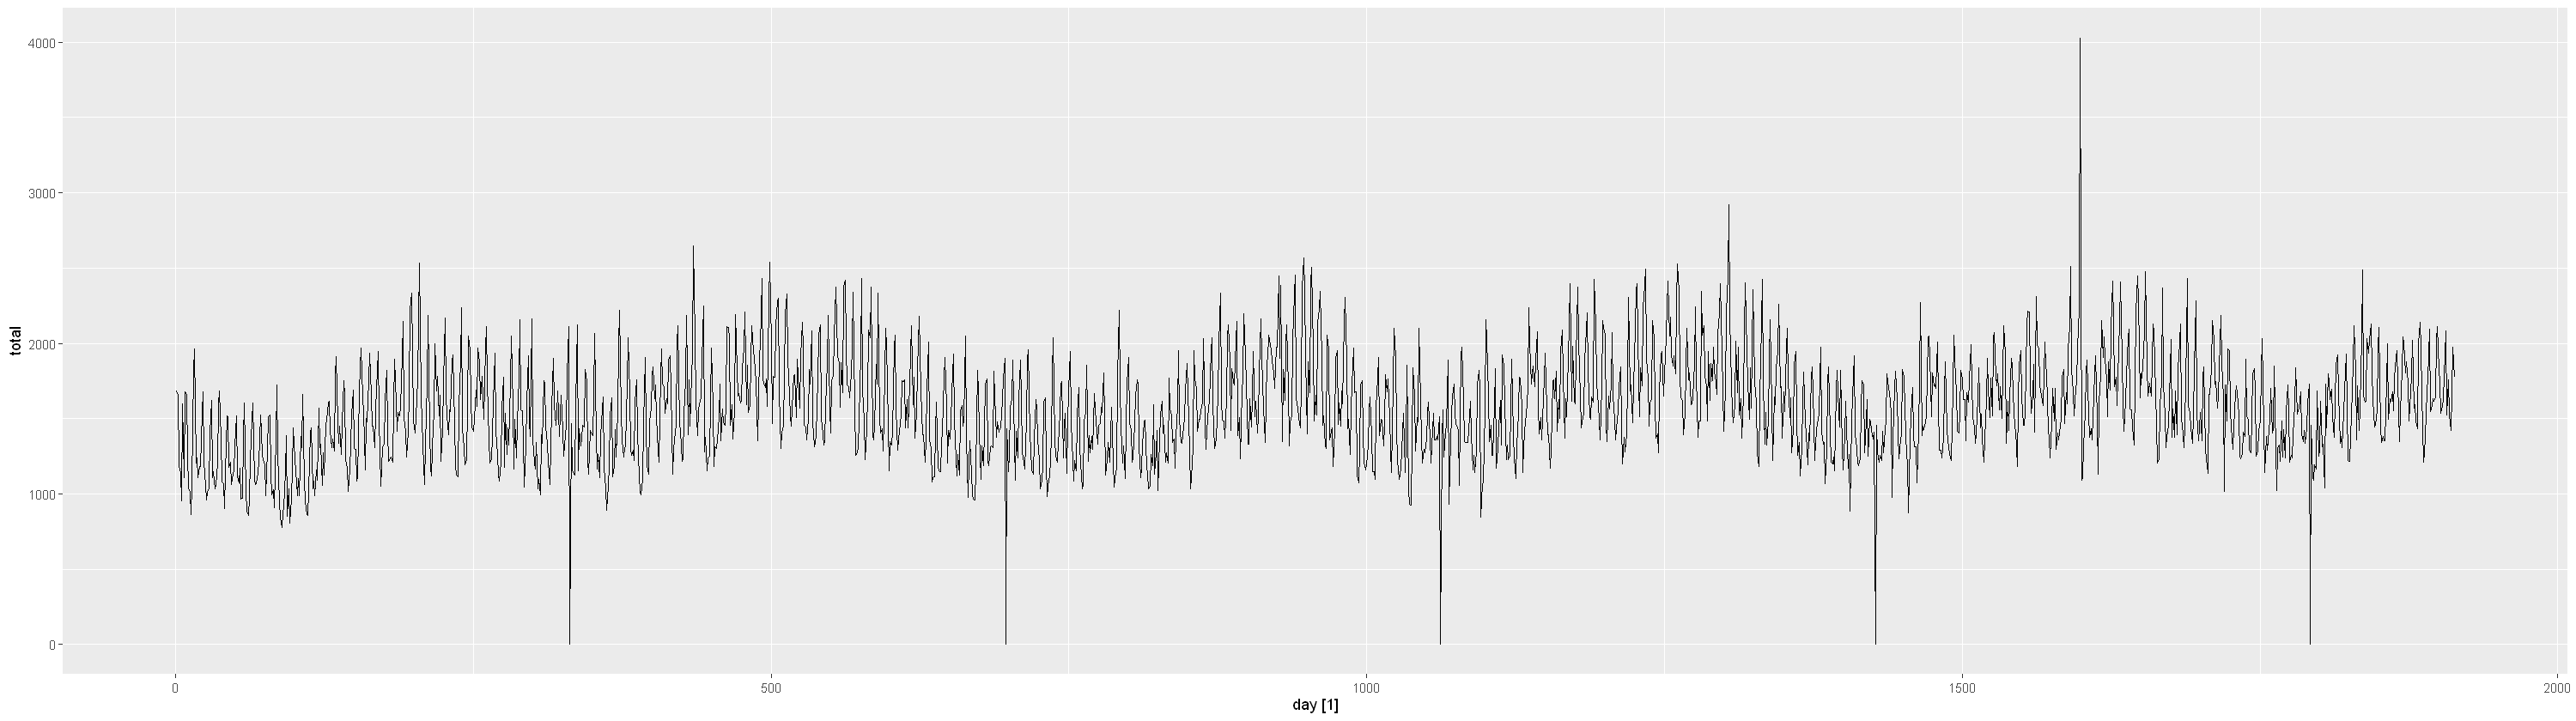

In [5]:
# Overall Food sales, informative. See cyclic behavior 

calendar_sales %>% autoplot(total)

In [6]:
is_regular(calendar_sales)

[1] TRUE

In [7]:
# Probably closed on christmas, sales is are aprox 0.
# Positive outlier on jun 15 2015, 4027 sales for some reason

calendar_sales[calendar_sales$total <=5, ]
calendar_sales[calendar_sales$total >=3500, ]

day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
331,12/25/2011,11148,Sunday,2,12,2011,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1
697,12/25/2012,11248,Tuesday,4,12,2012,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1
1062,12/25/2013,11348,Wednesday,5,12,2013,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,1,1
1427,12/25/2014,11447,Thursday,6,12,2014,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,4,1
1792,12/25/2015,11547,Friday,7,12,2015,Christmas,National,NA,⋯,0,0,0,0,0,0,0,0,2,1


day,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,⋯,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation,total,is_event
<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1599,6/15/2015,11520,Monday,3,6,2015,NA,NA,NA,⋯,1,1,4,0,0,0,2,0,4027,NA


In [8]:
calendar

date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9


In [9]:
calendar2 <- calendar 
calendar2$name <- 1:nrow(calendar)
sales <- sales_train %>% pivot_longer (2:ncol(sales_train)) 
sales$name <- gsub("d_", "", sales$name)
sales$id <- gsub("_TX_3_validation", "" ,sales$id)
sales$name <- as.integer(sales$name)

sales
calendar2

id,name,value
<chr>,<int>,<int>
FOODS_3_001,1,0
FOODS_3_001,2,2
FOODS_3_001,3,1
FOODS_3_001,4,3
FOODS_3_001,5,0
FOODS_3_001,6,0
FOODS_3_001,7,1
FOODS_3_001,8,0
FOODS_3_001,9,2


date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day,name
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9,9


In [10]:
sales
calendar2

id,name,value
<chr>,<int>,<int>
FOODS_3_001,1,0
FOODS_3_001,2,2
FOODS_3_001,3,1
FOODS_3_001,4,3
FOODS_3_001,5,0
FOODS_3_001,6,0
FOODS_3_001,7,1
FOODS_3_001,8,0
FOODS_3_001,9,2


date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX,day,name
<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1/29/2011,11101,Saturday,1,1,2011,NA,NA,NA,NA,0,1,1
1/30/2011,11101,Sunday,2,1,2011,NA,NA,NA,NA,0,2,2
1/31/2011,11101,Monday,3,1,2011,NA,NA,NA,NA,0,3,3
2/1/2011,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1,4,4
2/2/2011,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0,5,5
2/3/2011,11101,Thursday,6,2,2011,NA,NA,NA,NA,1,6,6
2/4/2011,11101,Friday,7,2,2011,NA,NA,NA,NA,0,7,7
2/5/2011,11102,Saturday,1,2,2011,NA,NA,NA,NA,1,8,8
2/6/2011,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1,9,9


In [21]:
calendar2_sales <- left_join(sales,calendar2, by='name') 
calendar2_sales$date <- as.Date(calendar2_sales$date, format = "%m/%d/%Y")
calendar2_sales <- calendar2_sales %>% as_tsibble(index = date , key = id)
calendar2_sales <- left_join(calendar2_sales, prices, by = c("wm_yr_wk" = "wm_yr_wk", "id"="item_id"))
#calendar2_sales$is_event <- ifelse(calendar2_sales$event_name_1 != "NA", 1, 0)

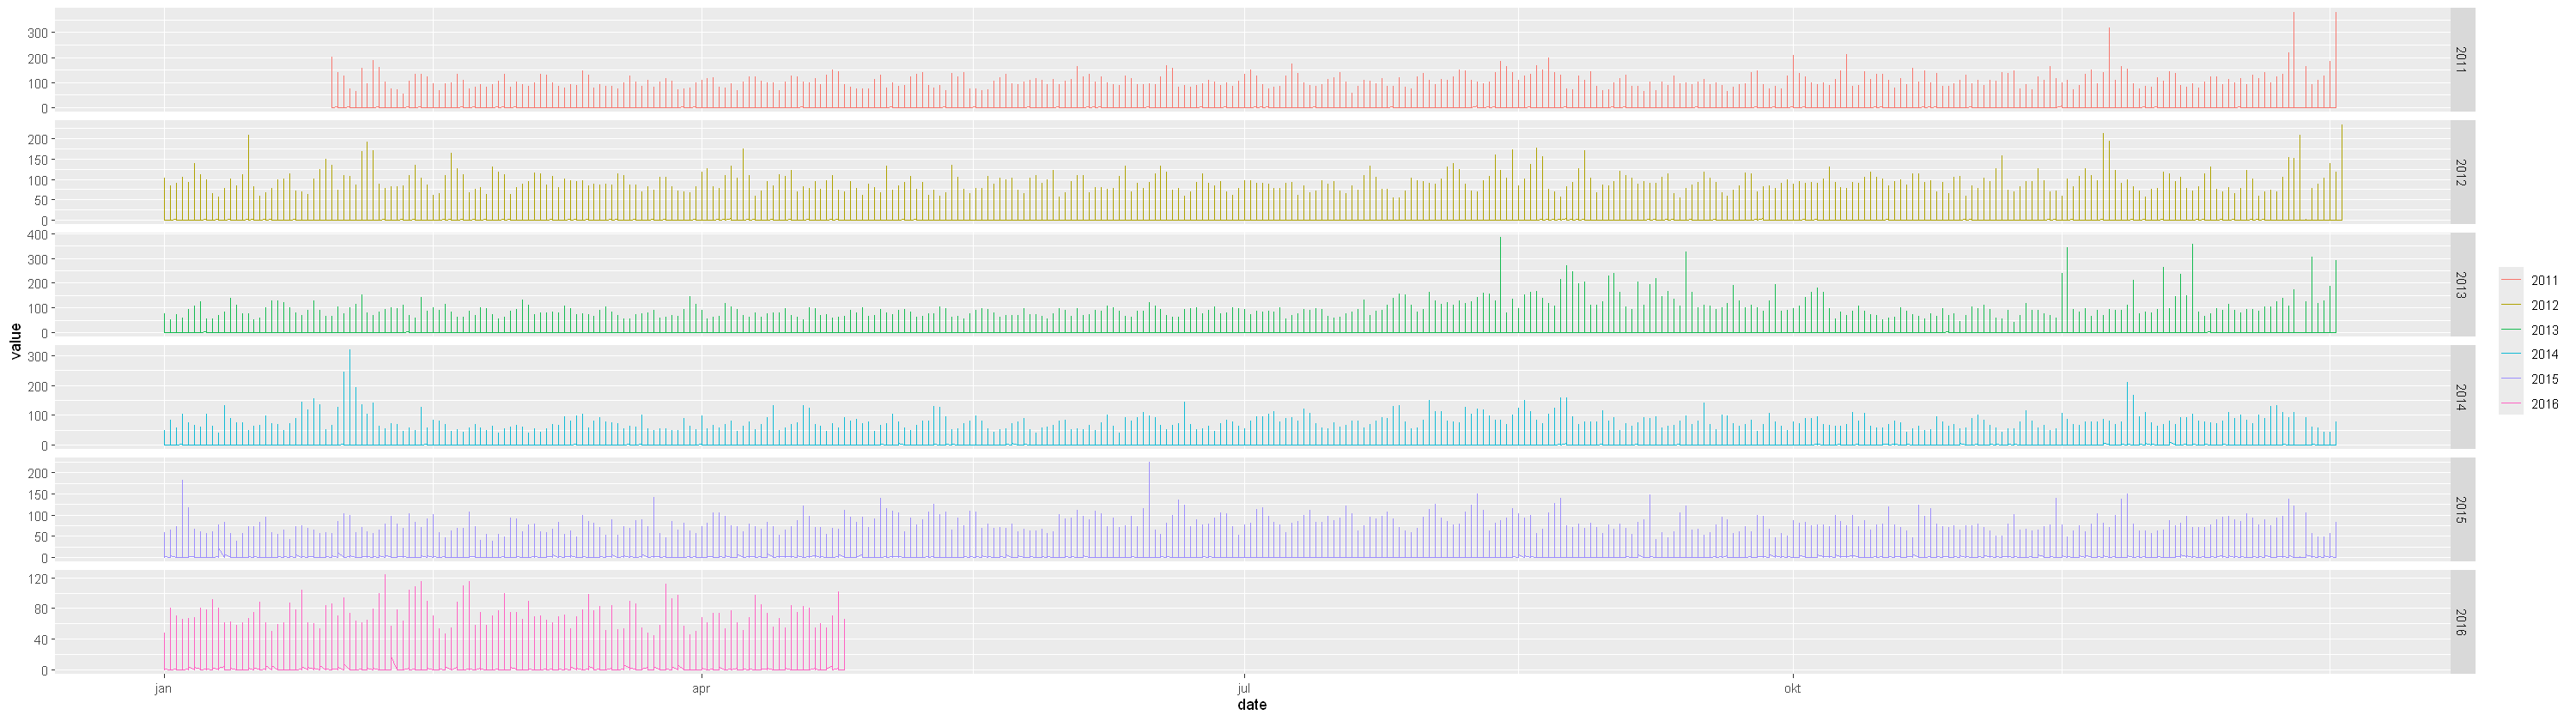

In [12]:
gg_season(calendar2_sales, y = value)

In [65]:
weekdays <- list('Monday', 'Tuesday', 'Wednesday', 'Thursday')
weekend <- list('Friday','Saturday', 'Sunday')

In [94]:
calendar2_sales$is_weekend <- ifelse(calendar2_sales$weekday %in% weekend, 1, 0)
calendar2_sales$event_name_1 <- replace(calendar2_sales$event_name_1, is.na(calendar2_sales$event_name_1), 0)
calendar2_sales$is_event <- ifelse(calendar2_sales$event_name_1 != 0, 1, 0)

final_data <- calendar2_sales[c("id","name","value",'date','wm_yr_wk','weekday','month', 'year','event_name_1','event_type_1','snap_TX','sell_price','is_event','is_weekend')]
final_data_numeric <- final_data[c('id','name','value','month','sell_price','is_event','is_weekend')]

final_data_numeric$value <- as.double(final_data_numeric$value)
final_data_numeric$name <- as.double(final_data_numeric$name)
final_data_numeric$month <- as.double(final_data_numeric$month)

In [76]:
unique(final_data_numeric$sell_price)

[1]  2.28  2.50  1.25  0.99  1.00  0.88    NA  2.56  3.98  1.98  3.64  4.27
 [13]  4.98  5.98  1.68  7.88  0.20  0.16  0.07  0.05  0.08  0.25  0.79  0.74
 [25]  0.50  1.99  2.78  2.84  1.88  2.16  2.68  2.88  1.97  2.00  2.48  2.38
 [37]  2.58  1.76  1.78  2.98  2.08  4.50  4.54  1.50  1.18  0.69  1.08  1.14
 [49]  0.94  2.18  1.48  0.98  1.67  3.78  3.88  2.67  1.66  3.50  1.28  1.38
 [61]  1.34  1.44  2.99  4.38  4.68  3.58  3.68  4.18  4.28  1.58  1.77  0.89
 [73]  4.74  1.64  1.94  3.48  1.39  1.89  1.74  2.25  2.94  0.67  3.28  2.97
 [85]  0.09  0.10  4.48  6.48  4.42 18.98 19.48 17.88 18.73  4.88  5.48  5.64
 [97]  3.00  3.67  2.24  2.75  8.68  9.78 11.46 11.98  2.47  5.78  4.99  5.44
[109]  2.53  0.38  0.82  0.59  0.78  0.80  6.98  2.40  4.78  4.93  1.84  2.46
[121]  3.99  3.32  6.24  5.99  1.19  3.38  3.27  3.96  3.65 10.98  9.98 11.88
[133] 13.98 11.82  6.18  7.48  1.52  3.43  0.75  5.93  2.26  5.94  6.44  2.37
[145]  4.58  1.24  2.49  1.36  0.77  3.33  1.69  2.72  3.26  3.18  1.87  9.88
[157]  9.86  3.19  1.32  4.94  2.52  1.72  6.50  6.54  6.72  3.62  5.28  8.98
[169] 13.68  0.95  3.56  4.83  4.22  1.12  1.60  5.49  6.94 18.96 18.00  3.74
[181]  3.76  1.06  0.66  0.64  1.49  3.34  1.79  1.65  0.49  3.47  4.00  0.83
[193]  1.29  2.77  5.24  3.54 10.84 11.48  5.62  0.63  0.70  2.92  0.02  5.18
[205]  4.97  8.48  5.22  4.72  1.54  5.88  6.00  6.68  3.57  3.82  2.54  3.86
[217]  4.12  4.87  2.33  2.74  0.13  2.57  8.28  9.44  3.94  3.24  2.66  3.12
[229]  3.42  3.37  4.29  3.52  0.68  2.64  5.00  1.96  2.14  1.92  2.42  2.76
[241]  6.88  1.35  0.15  0.57  2.86  2.34

In [77]:
final_data_numeric$sell_price

[1] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [15] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [29] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [43] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [57] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [71] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [85] 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28 2.28
   [99] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [113] 1.25 1.25 1.25 1.25 1.25 1.25 1.25 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [127] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [141] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [155] 0.99 0.99 0.99 0.99 0.99 0.99 0.99 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [169] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [183] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [197] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [211] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [225] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [239] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [253] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [267] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [281] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [295] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [309] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [323] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [337] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [351] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [365] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [379] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [393] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [407] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [421] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [435] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [449] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 1.00 1.00 1.00 1.00 1.00 1.00 1.00
  [463] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [477] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [491] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [505] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [519] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [533] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [547] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [561] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [575] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [589] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [603] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [617] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [631] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [645] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [659] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [673] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [687] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [701] 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50 2.50
  [715] 2.50 2.50 2.50 2.5

In [92]:
cormat <- round(cor(final_data_numeric, use = "pairwise.complete.obs"),2)
cormat

,name,value,month,sell_price,is_event,is_weekend
name,1.00,0.01,0.03,0.02,0.00,0.00
value,0.01,1.00,0.00,-0.13,0.00,0.03
month,0.03,0.00,1.00,0.00,-0.07,0.00
sell_price,0.02,-0.13,0.00,1.00,0.00,0.00
is_event,0.00,0.00,-0.07,0.00,1.00,-0.04
is_weekend,0.00,0.03,0.00,0.00,-0.04,1.00


In [99]:
final_data_numeric

id,name,value,month,sell_price,is_event,is_weekend
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FOODS_3_001,1,0,1,2.28,0,1
FOODS_3_001,2,2,1,2.28,0,1
FOODS_3_001,3,1,1,2.28,0,0
FOODS_3_001,4,3,2,2.28,0,0
FOODS_3_001,5,0,2,2.28,0,0
FOODS_3_001,6,0,2,2.28,0,0
FOODS_3_001,7,1,2,2.28,0,1
FOODS_3_001,8,0,2,2.28,0,1
FOODS_3_001,9,2,2,2.28,1,1


In [100]:
to_forecast <- final_data_numeric %>% as_tsibble(key = "id", index="name")

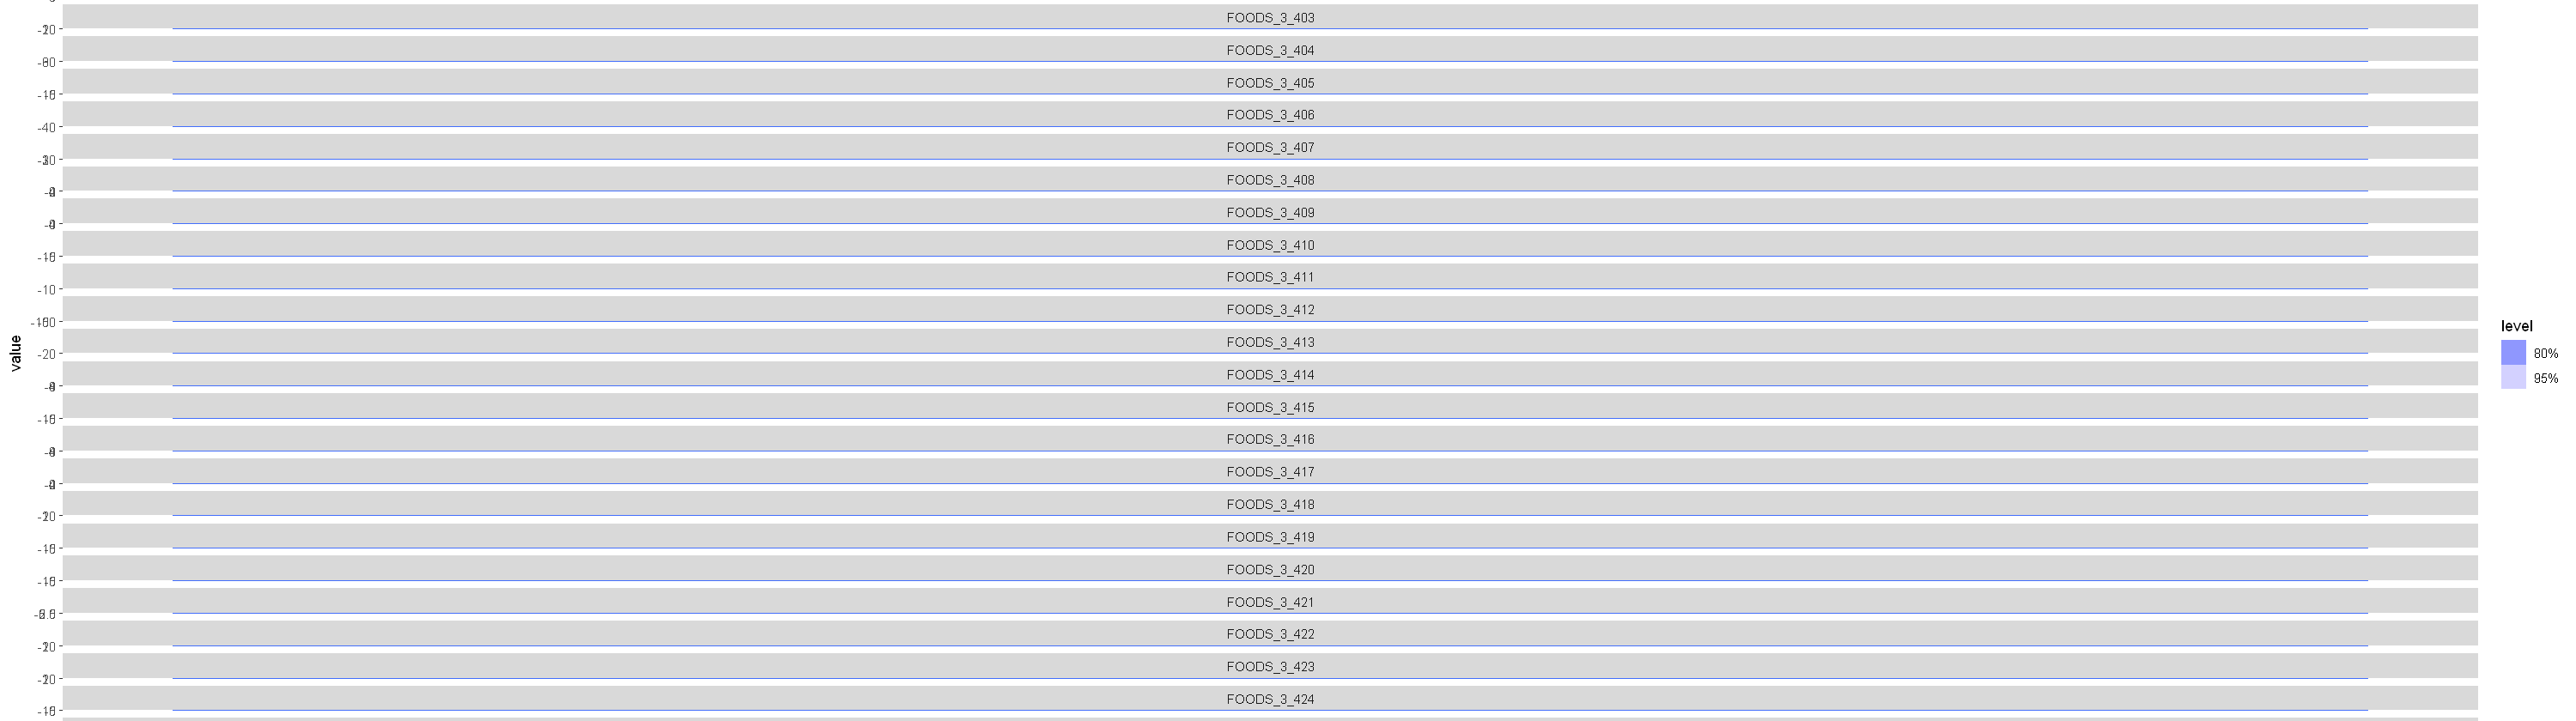

In [105]:
x<- to_forecast %>% model(NAIVE(value)) %>% forecast(h=28)

In [138]:
fc

id,.model,name,value,.mean
<chr>,<chr>,<dbl>,<dist>,<dbl>
FOODS_3_001,NAIVE(value),1914,"N(0, 0.92)",0
FOODS_3_001,NAIVE(value),1915,"N(0, 1.8)",0
FOODS_3_001,NAIVE(value),1916,"N(0, 2.8)",0
FOODS_3_001,NAIVE(value),1917,"N(0, 3.7)",0
FOODS_3_001,NAIVE(value),1918,"N(0, 4.6)",0
FOODS_3_001,NAIVE(value),1919,"N(0, 5.5)",0
FOODS_3_001,NAIVE(value),1920,"N(0, 6.5)",0
FOODS_3_001,NAIVE(value),1921,"N(0, 7.4)",0
FOODS_3_001,NAIVE(value),1922,"N(0, 8.3)",0


In [144]:
fc <- x %>% filter(id == "FOODS_3_827" | id == "FOODS_3_001")
#l <- fc[c("id","name", ".mean")]
#l <- pivot_wider(fc)
#pivot_wider(l)

pivot_wider(as_tibble(fc), id_cols=="id")

Warning message:
"Specifying the `id_cols` argument by position was deprecated in tidyr 1.3.0.
ℹ Please explicitly name `id_cols`, like `id_cols = id_cols == "id"`."


ERROR: [1m[33mError[39m in `pivot_wider()`:[22m
[1m[22m[36mℹ[39m In argument: `id_cols == "id"`.
[1mCaused by error:[22m
[33m![39m object 'id_cols' not found
